<a href="https://colab.research.google.com/github/NadaBotros/ACML/blob/master/bachelorProjectGoodResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import pandas as pd
import numpy as np
from random import random as rand
from random import sample
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,LeakyReLU,UpSampling2D,Dropout,Conv1D,Flatten,Input,Embedding,Activation,TimeDistributed,Conv2D,MaxPool2D,MaxPooling2D,Conv1D,MaxPool1D,MaxPooling1D,Bidirectional,concatenate
from keras.models import Model
from keras.layers import LSTM
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

In [233]:
np.random.seed(42)

In [234]:
data = pd.read_csv('/content/data.csv')

In [235]:
data.head()

,Power,Rpm,Bpm,PedalBlob,HeelBlob,AnkleBlob,KneeBlob,KneeBlob2,HipBlob
0,70,84,93,87.365252,93.664993,153.219998,129.651301,50.348699,57.880403
1,72,87,94,68.580154,78.741394,144.310995,66.360850,113.639150,23.906760
2,74,85,96,40.932063,87.590054,148.065035,126.466182,53.533818,47.949046
3,76,86,97,22.870888,80.794876,147.206440,78.979316,101.020684,37.680583
4,74,87,97,5.783904,81.411350,143.271388,107.999022,72.000978,33.141440


In [236]:
# y = data[['Power','Rpm','Bpm']].values
y = data[['Power']].values


In [237]:
x = data[['PedalBlob','HeelBlob','KneeBlob','KneeBlob2','HipBlob']].values

In [238]:
np.unique(y,return_counts=True)

(array([ 41,  42,  43,  44,  45,  46,  47,  48,  57,  58,  59,  60,  61,
         62,  63,  64,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  92,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134,
        135, 136, 140, 141, 142, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 163, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 207, 209, 210, 212, 217, 219, 228, 234, 235, 236, 237,
        238, 239, 240, 241, 243, 255, 256, 257, 258, 259, 260, 261, 262,
        279]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  4,  2,
         2,  5,  2, 10,  9, 12, 1

In [239]:
X=[]
Y=[]
for i in range(len(x)-1):
    X.append(x[i:i+2])
    Y.append(y[i+1])
X = np.array(X)
Y = np.array(Y)

In [240]:
np.unique(Y,return_counts=True)

(array([ 41,  42,  43,  44,  45,  46,  47,  48,  57,  58,  59,  60,  61,
         62,  63,  64,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  92,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134,
        135, 136, 140, 141, 142, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 163, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 207, 209, 210, 212, 217, 219, 228, 234, 235, 236, 237,
        238, 239, 240, 241, 243, 255, 256, 257, 258, 259, 260, 261, 262,
        279]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  4,  2,
         2,  4,  2, 10,  9, 12, 1

In [241]:
def change_vals(old1,old2,new,y):
  for i in range(len(y)):
      if (old1<=y[i]<old2):
        y[i]= new

In [242]:
lX = X.copy()
lY = Y.copy()
steps=10
for i in range(np.min(lY),np.max(lY),steps):
  change_vals(i,i+steps,i,lY)
np.unique(lY,return_counts=True)

(array([ 41,  51,  61,  71,  81,  91, 101, 111, 121, 131, 141, 151, 161,
        171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271]),
 array([ 16,   9,  18,  99,  41,  22, 116, 158,  19,   8,   3,  14,  10,
         47,  49,  60,  26,   5,   1,  15,   3,  12,   4,   2]))

In [243]:
model = Sequential()
model.add((LSTM(20, return_sequences=True, input_shape=(2,5))))
model.add((LSTM(10, return_sequences=False)))
model.add((Dense(1, activation='sigmoid')))
model.compile(loss='mse',
            optimizer=keras.optimizers.RMSprop(1e-5),
            metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 2, 20)             2080      
_________________________________________________________________
lstm_32 (LSTM)               (None, 10)                1240      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________


In [244]:

save_best=keras.callbacks.ModelCheckpoint(f"/content/model.h5",
                                                  monitor='val_loss', verbose=1,
                                                  save_best_only=True)

early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,
                                                  patience=15, verbose=1, mode='auto',
                                                  restore_best_weights=True)


In [204]:
print(X.shape,Y.shape)

(757, 2, 5) (757, 1)


In [246]:
x_reshaped = lX.reshape((len(lX),2,5))

In [247]:
history = model.fit(x_reshaped,lY/np.max(lY),
        batch_size=32,epochs=2000,verbose=1,
        validation_data=(lX,lY/np.max(lY)),
        callbacks=[save_best,early_stop],
        shuffle=False)

Streaming output truncated to the last 5000 lines.
757/757 [==============================] - 0s 157us/step - loss: 0.0302 - accuracy: 0.0026 - val_loss: 0.0302 - val_accuracy: 0.0026

Epoch 00751: val_loss improved from 0.03018 to 0.03017, saving model to /content/model.h5
Epoch 752/2000
757/757 [==============================] - 0s 160us/step - loss: 0.0302 - accuracy: 0.0026 - val_loss: 0.0302 - val_accuracy: 0.0026

Epoch 00752: val_loss improved from 0.03017 to 0.03017, saving model to /content/model.h5
Epoch 753/2000
757/757 [==============================] - 0s 160us/step - loss: 0.0302 - accuracy: 0.0026 - val_loss: 0.0302 - val_accuracy: 0.0026

Epoch 00753: val_loss improved from 0.03017 to 0.03016, saving model to /content/model.h5
Epoch 754/2000
757/757 [==============================] - 0s 156us/step - loss: 0.0302 - accuracy: 0.0026 - val_loss: 0.0302 - val_accuracy: 0.0026

Epoch 00754: val_loss improved from 0.03016 to 0.03016, saving model to /content/model.h5
Epoch 75

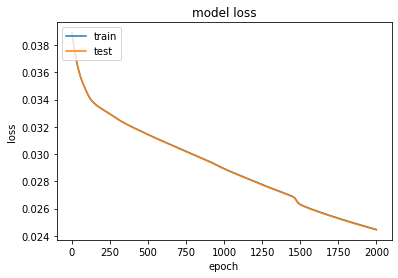

In [248]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [210]:
x_reshaped = lX.reshape((len(lX),2,5))

In [249]:
i=50
pred = (model.predict(lX[:i]))
real = (lY[:i]/np.max(lY))

In [251]:

c=0
for i in range(len(pred)):
  print(f"real: {real[i]}\npred: {pred[i]}")
  print()
  
  c+=1

print(c)

real: [0.26199262]
pred: [0.4076454]

real: [0.26199262]
pred: [0.4155495]

real: [0.26199262]
pred: [0.5112923]

real: [0.26199262]
pred: [0.40809593]

real: [0.26199262]
pred: [0.47868335]

real: [0.26199262]
pred: [0.4531284]

real: [0.22509225]
pred: [0.45953462]

real: [0.22509225]
pred: [0.38412234]

real: [0.26199262]
pred: [0.39267594]

real: [0.29889299]
pred: [0.39540198]

real: [0.26199262]
pred: [0.40262574]

real: [0.26199262]
pred: [0.434359]

real: [0.26199262]
pred: [0.44067037]

real: [0.29889299]
pred: [0.47185695]

real: [0.26199262]
pred: [0.44766107]

real: [0.26199262]
pred: [0.5061904]

real: [0.26199262]
pred: [0.28213245]

real: [0.26199262]
pred: [0.28142285]

real: [0.26199262]
pred: [0.38763314]

real: [0.26199262]
pred: [0.42740527]

real: [0.26199262]
pred: [0.266757]

real: [0.26199262]
pred: [0.31179836]

real: [0.29889299]
pred: [0.42756146]

real: [0.29889299]
pred: [0.2502569]

real: [0.29889299]
pred: [0.24892056]

real: [0.26199262]
pred: [0.3601353

In [ ]:
X = x.copy()

In [ ]:
X = set(tuple(element) for element in X)

In [ ]:
len(X)

661

In [ ]:
lX[0]

array([195, 101, 129])

In [ ]:
lX =[]
lY=[]
for i in range(len(data)):
  Dat = data[(data.Power==x[i,0]) & (data.Rpm==x[i,1]) & (data.Bpm==x[i,2]) ]
  avged = Dat[['PedalBlob']].mean()
  lX.append(Dat[['Power','Rpm','Bpm']].mean().values)
  lY.append(avged[0])
  # if (len(Dat)>1):
  # else:
  #     lY.append(avged[0])


In [ ]:
lX= np.array(lX)
lY= np.array(lY)
lX.shape

(758, 3)

In [ ]:
lX= []
for X_ in X:
  print(X_)
  lX.append(np.array(X_))

[[ 87.36525163  93.66499315 129.6513013   50.34869874  57.88040264]
 [ 68.58015396  78.74139371  66.36084952 113.6391505   23.90676032]]
[[ 68.58015396  78.74139371  66.36084952 113.6391505   23.90676032]
 [ 40.93206288  87.59005369 126.4661822   53.53381776  47.94904598]]
[[ 40.93206288  87.59005369 126.4661822   53.53381776  47.94904598]
 [ 22.87088772  80.7948755   78.97931622 101.0206838   37.68058282]]
[[ 22.87088772  80.7948755   78.97931622 101.0206838   37.68058282]
 [  5.7839035   81.41134997 107.9990222   72.00097783  33.14144039]]
[[  5.7839035   81.41134997 107.9990222   72.00097783  33.14144039]
 [  6.45751857  84.02692343  91.13193973  88.86806027  45.47829136]]
[[ 6.45751857 84.02692343 91.13193973 88.86806027 45.47829136]
 [ 7.93286311 80.96555506 99.61527626 80.38472374 27.16692023]]
[[  7.93286311  80.96555506  99.61527626  80.38472374  27.16692023]
 [ 37.54656035  81.26096348 108.3265071   71.67349285  53.59086616]]
[[ 37.54656035  81.26096348 108.3265071   71.673492

In [ ]:
lX = np.array(lX)

In [ ]:
lX.shape

(661, 3)

[110  80 119]
[120  83 120]
